In [1]:
#Appunti
#C'è qualcosa che non funziona, probabilmente un bug. 
#Questo si manifesta quando γ è un valore tra 0 e 1. Più γ è vicino a 0.5 e
# prima arriva il bug
#Il bug consiste nell'annullamento della μ calcolata. Questa annulla 
# le ν calcolate con tale μ siccome c'è un prodotto.
# Però siccome c'è una dipendenza da γ mi viene da pensare che tutto dipenda da ν. 
# E in particolare il pasticcio succede quando c'è alternanza tra seed e non seed (siccome è massimo 
# quando γ=0.5)
# Il fatto che μ venga a somma 0 NON dipende dal valore dei ritardi sij e sji. L'ho verificato


# Dubbi:
#1 come mai le chiavi di a sembrano random?
#2 come faccio a non fare re-inserimento ?? Ricorda io estraggo d-1 cosi, più uno, più un altro che è quello di arrivo

In [305]:
import OffsetArrays
using Plots
using Revise
include("functions.jl")

rand_disorder (generic function with 1 method)

In [306]:
# S=0   I=1
# The times go from ti = 0 to ti=T+1
# when ti=0 it means that i is the zero patient
# when ti=T+1 it means that i is never infected

λ = 0.2 #infection rate
d = 5 # degree (fixed for now) 
T = 10 # discrete time
γ = 0.2 # autoinfection probability
N = 10; #population size

# Population dynamics for the messages

In [307]:
# Creation of the population
# we create μ as the set of all the N functions
# μ[k,ti,ck,τi,σk] is the value taken by the
# function μk with arguments ti,ck,τi,σk
# Using OffsetArrays we managed to keep notation 
# coherent with the notes: 

# i=1,...,N, 
# ti=0,...,T+1 
# c = 0,1
# σ=0,1,2

# The same is done for the ν function later
inizialization = ones(N,T+2,2,T+2,3) / (6*(T+2)^2)
μ = OffsetArrays.OffsetArray(inizialization,0,-1,-1,-1,-1);

In [308]:
#Precalculation of the function a := (1-λ)^{tθ(t)}, 
#useful for later (the function a appears
#  in the inferred time factor node)

a = Dict(zip(-T-2:T+1,[ t<=0 ? 1 : (1-λ)^t for t = -T-2:T+1]));
μold = copy(μ);

In [309]:
ν = OffsetArrays.OffsetArray(zeros(T+2,T+2,T+2,3),-1,-1,-1,-1);
neighbours = rand(1:N,d-1);

xi0 = 0
xi0 = 0
xi0 = 1
xi0 = 0
xi0 = 0
sum-zero μ
xi0 = 0
sum-zero ν
xi0 = 1
sum-zero μ
xi0 = 0
xi0 = 0
sum-zero μ
sum-zero ν
xi0 = 0
sum-zero μ


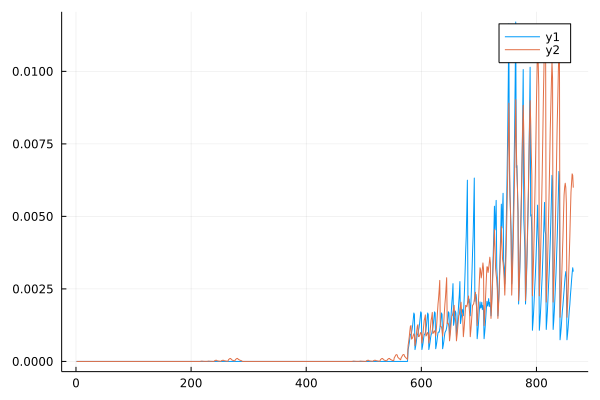

In [328]:
tot_iterations = 10
for iterations = 1:tot_iterations
    # Extraction of disorder: state of individual i: xi0, delays: sij and sji

    xi0,sij,sji = rand_disorder(γ,λ)

    # Initialization of ν=0
    ν = OffsetArrays.OffsetArray(zeros(T+2,T+2,T+2,3),-1,-1,-1,-1)

    #Extraction of d-1 μ's from population
    neighbours = rand(1:N,d-1)

    #Beginning of calculations: we start by calculating the ν: 
    calculate_ν!(ν,μ,neighbours,xi0,T)
    
    # Now we use the ν vector just calculated to extract the new μ.
    # We extract a population index that we call "l".
    # We overwrite the μ in postition μ[l,:,:,:,:]
    @show xi0
    l = rand(1:N);

    # First we calculate and store the cumulated of ν with respect to 
    # planted time, i.e. the third argument. We call Σ this cumulated 
    Σ = cumsum(ν,dims=3)
    update_μ!(μ,ν,Σ,l,sij,sji,T)     
end

p1=plot(reshape(sum(μ,dims=1) ./ N,864))
p1=plot!(reshape(sum(μold,dims=1) ./ N,864))
μold = copy(μ);
plot(p1)

In [329]:
sij

LoadError: UndefVarError: sij not defined

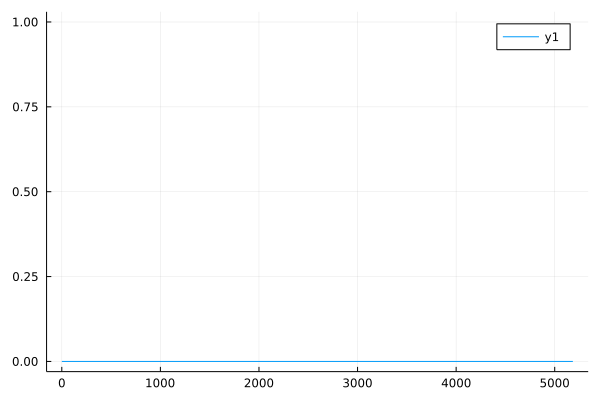

In [330]:
plot(reshape(ν,5184))

Once the convergence has been studied we plot the heatmaps of the messages

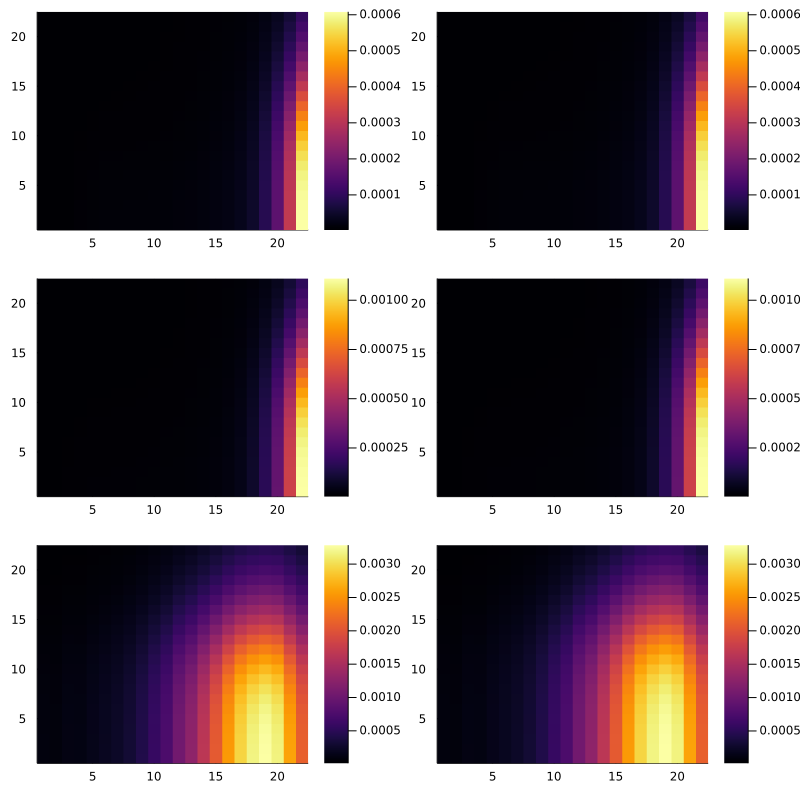

In [1074]:
pl1 = heatmap(reshape(sum(μ,dims=1)[:,:,0,:,0] ./ N,T+2,T+2))
pl2 = heatmap(reshape(sum(μ,dims=1)[:,:,1,:,0] ./ N,T+2,T+2))
pl3 = heatmap(reshape(sum(μ,dims=1)[:,:,0,:,1] ./ N,T+2,T+2))
pl4 = heatmap(reshape(sum(μ,dims=1)[:,:,1,:,1] ./ N,T+2,T+2))
pl5 = heatmap(reshape(sum(μ,dims=1)[:,:,0,:,2] ./ N,T+2,T+2))
pl6 = heatmap(reshape(sum(μ,dims=1)[:,:,1,:,2] ./ N,T+2,T+2))

plot(pl1,pl2,pl3,pl4,pl5,pl6,layout = (3,2),size = (800,800))

# From messages to marginals

In [1075]:
p = OffsetArrays.OffsetArray(zeros(T+2,T+2,T+2),-1,-1,-1);
marg = OffsetArrays.OffsetArray(zeros(N,T+2,T+2),0,-1,-1);
count = 0;

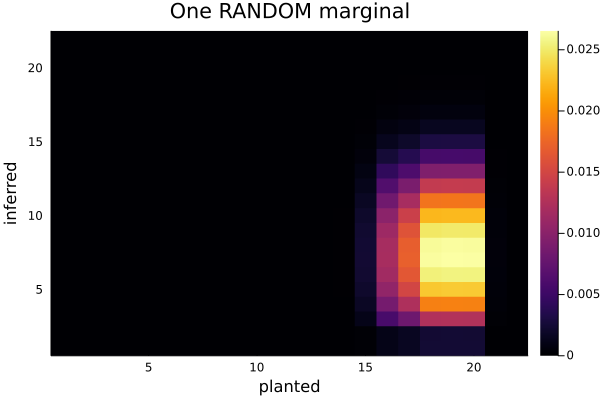

In [1076]:
# Now we take out converged population of μ and use it to extract marginals.
# First we extract two ν's and then we combine it in order to obtain a marginal.
# In order to extract a ν we have to extract d-1 μ's. Therefore we extract two groups of 
# d-1 μ's and from them we calculate the two ν's. We also have to extract disorder.
count += 1
group1 = rand(1:N,d-1) #groups of neighbours 
group2 = rand(1:N,d-1)
xi0,sij,sji = rand_disorder(γ,λ) #disorder

ν1 = OffsetArrays.OffsetArray(zeros(T+2,T+2,T+2,3),-1,-1,-1,-1)
ν2 = OffsetArrays.OffsetArray(zeros(T+2,T+2,T+2,3),-1,-1,-1,-1)

calculate_ν!(ν1,μ,group1,xi0,T)
calculate_ν!(ν2,μ,group2,xi0,T)

#Once the ν are calculated we have to cumulate with respect the third argument
Σ = cumsum(ν2,dims=3)

for ti = 0:T+1
    for τi = 0:T+1
        for tj = 0:T+1
            Γ = Σ[tj,ti,min(τi+sij-1,T+1),2]-Int(τi-sji>=0)*Σ[tj,ti,max(τi-sji,0),2]+Int(τi+sij<=T+1)*ν2[tj,ti,min(τi+sij,T+1),1]
               +Σ[tj,ti,T+1,0]-Σ[tj,ti,min(τi+sij,T+1),0]
            p[ti,tj,τi] = ν1[ti,tj,τi,0]*Int(τi-sji-1>=0)*Σ[tj,ti,max(τi-sji-1,0),2] +
                          ν1[ti,tj,τi,1]*Int(τi-sji>=0)*ν2[tj,ti,max(τi-sji,0),2] + ν1[ti,tj,τi,2]*Γ 
        end
    end
end
l = rand(1:N)
marg[l,:,:] = sum(p,dims=2)
marg[l,:,:] ./= sum(marg[l,:,:]);
heatmap(reshape((marg[l,:,:]),22,22),xlabel="planted",ylabel="inferred",title="One RANDOM marginal")

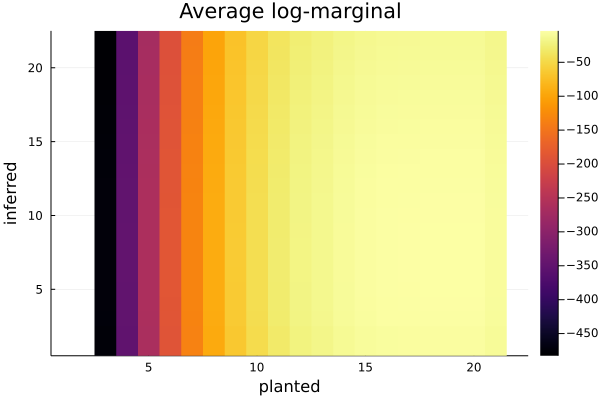

In [1077]:
heatmap(reshape(log.(sum(marg,dims=1)./ count),22,22),xlabel="planted",ylabel="inferred",title="Average log-marginal")